<a href="https://colab.research.google.com/github/carolina-bolnykh/nyc-airbnb-datamining/blob/main/csc422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1:** Import Packages and Modules

In [ ]:
# foundational modules
import numpy as np # algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

### **Step 2:** Load and Examine Data Set

In [ ]:
df = pd.read_csv("/content/sample_data/AB_NYC_2019.csv")

In [ ]:
profile_report_html_file = "airbnb_report.html"
print ("Profile Report File: ", profile_report_html_file)

Profile Report File:  airbnb_report.html


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# exploring which types of columns we have
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### **Step 3:** Data Preprocessing: Cleaning and preparing the dataset for analysis. Handling missing data, removing outliers, and ensuring data quality.


**Missing Data:** How many missing values for each column


In [ ]:
missing_count = df.isna().sum()
print(missing_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Most of the columns/attributes do not have many missing values, however name, host_name, last_review, and reviews_per_month do have missing values. Since last_review, and reviews_per_month have more than 10,000 missing values, we will decide to drop the missing values.


In [ ]:
total_observations = df.shape[0]
print(total_observations)

48895


There is a total of 48,895 rows


*   10,052 last_review are missing/empty
*   10,052 reviews_per_month are missing/empty

This is quite a large (20%) percentage of our dataset, but we don't want to drop the entire attribute, but instead we will drop only the missing values since we believe that reviews are going to provide meaningful insights.



1.   16 names are missing/empty
2.   21 host_names are missing/empty

We will be dropping these instances from the attribute since they contribute to such a small part of the dataset (<1%)





In [ ]:
# Dropping rows with missing "name" values
df = df.dropna(subset=['name'])

# Reset the index after dropping rows, so we don't have a pointer to an empty row
df = df.reset_index(drop=True)

If we did this correctly, we should see 16 less rows 48,895 - 16 = 48,879

In [ ]:
total_observations = df.shape[0]
print(total_observations)

48879


Now, let's do the same for all 3 other attributes (drop the rows with  missing instances)

In [ ]:
df = df.dropna(subset=['host_name'])
df = df.reset_index(drop=True)

df = df.dropna(subset=['last_review'])
df = df.reset_index(drop=True)

df = df.dropna(subset=['reviews_per_month'])
df = df.reset_index(drop=True)

In [ ]:
total_observations = df.shape[0]
print(total_observations)

38821


In [ ]:
# let's confirm that there are no missing values:
missing_count = df.isna().sum()
print(missing_count)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


We cleaned the dataset and removed missing values (but we did not remove any attributes yet)! That could potentially be something we do during noise filtering. We will not be worried about removing outliers, since this is something we want to explore further in our analysis.


**Exploring Outliers** Do we or do we not remove outliers?

Visualization for outliers: focusing on numerical attributes
-> creating histograms to just get a feel of the data spread for each of the numerical variables
-> histograms are the top choice for numerical data


*   price
*   minimum_nights
*   number_of_reviews
*   reviews_per_month
*   calculated_host_listings_count
*   availability_365

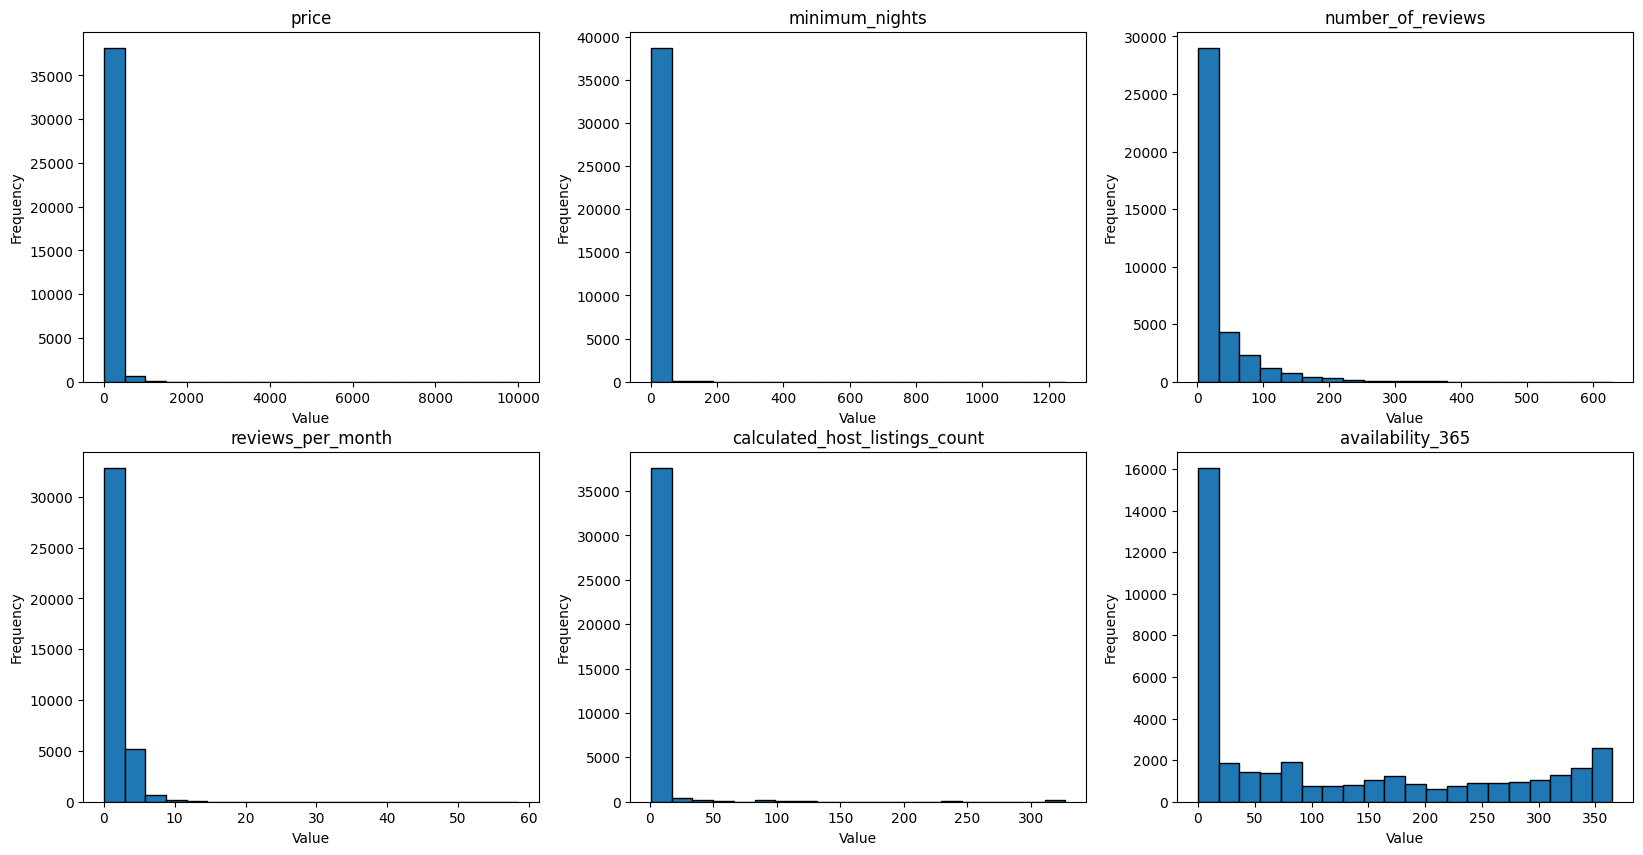

In [ ]:
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'calculated_host_listings_count', 'availability_365']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, column in enumerate(numerical_columns):
    ax = axes[i // 3, i % 3]
    ax.hist(df[column], bins=20, edgecolor='k')
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Display the plot
plt.show()

The preprocessing is done, and the next steps are data mining/exploratory analysis for each one of the variables.

## Final Report:
### identifying patterns related to the distribution of reviews, ratings, and trends over time. Our main question we want to answer is which metric/feature drives price? This will be helpful to airbnb hosts to know what to focus on in order to maximize profits and bookings for their listings, since they will take into account what truly drives pricing in this hidden housing market.

### Correlation analysis between price and reviews:


In [ ]:
columnsToAnalyze = ['number_of_reviews', 'price']
dataClusters = df[columnsToAnalyze].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataClusters)

In [ ]:
corrl = df[columnsToAnalyze].dropna()

In [ ]:
correlationData = corrl.corr()

In [ ]:
print(correlationData)

                   number_of_reviews     price
number_of_reviews           1.000000 -0.035924
price                      -0.035924  1.000000


###Analysis of correlation:
How price impacts number of reviews: As the price increases, there is a very weak negative correlation with the number of reviews, indicating that, on average, higher-priced listings tend to have slightly fewer reviews. The correlation coefficient is approximately -0.036%, suggesting a minimal linear relationship between price and the number of reviews

###Correlation analysis between availability out of 365 days and price

In [ ]:
columnsToAnalyze = ['availability_365', 'price']
dataClusters = df[columnsToAnalyze].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataClusters)

In [ ]:
corrl = df[columnsToAnalyze].dropna()

In [ ]:
correlationData = corrl.corr()

In [ ]:
print(correlationData)

                  availability_365     price
availability_365          1.000000  0.078276
price                     0.078276  1.000000


**How yearly availablity impacts number of reviews:** As the price increases, there is a very weak positive correlation with the number of reviews, indicating that, on average, higher-priced listings tend to have more availability. The correlation coefficient is approximately 0.078%, suggesting a minimal linear relationship between price and the availability out of 365 days


##Correlation analysis between location and price

###Chose ANOVA as the method for categorical groups of variables, like the neighbourhood

Here, our null hypothesis is that there is no correlation between the neighborhood and the price of the Airbnb:

H0 = neighborhood **does not** have an effect on price

H1 = neighborhood **does** have an effect on price

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
model = ols('price ~ neighbourhood', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq       df          F  PR(>F)
neighbourhood  1.109660e+08    217.0  14.145412     0.0
Residual       1.395519e+09  38603.0        NaN     NaN


the ANOVA suggests that there is a statistically significant difference in mean prices among different neighbourhoods. The 'neighbourhood' variable appears to have an effect on prices. Since the P-value is 0, we reject the Null hypothesis Ho that neighborhood does not have an effect on price